In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import shapely

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
if os.path.isfile("../Meteor_Landing.csv"):
    filepath = "../Meteor_Landing.csv"
    print "Loading"
Meteor_Landing = pd.read_csv(filepath)
print "Loaded"

Loading
Loaded


In [6]:
Meteor_Landing.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


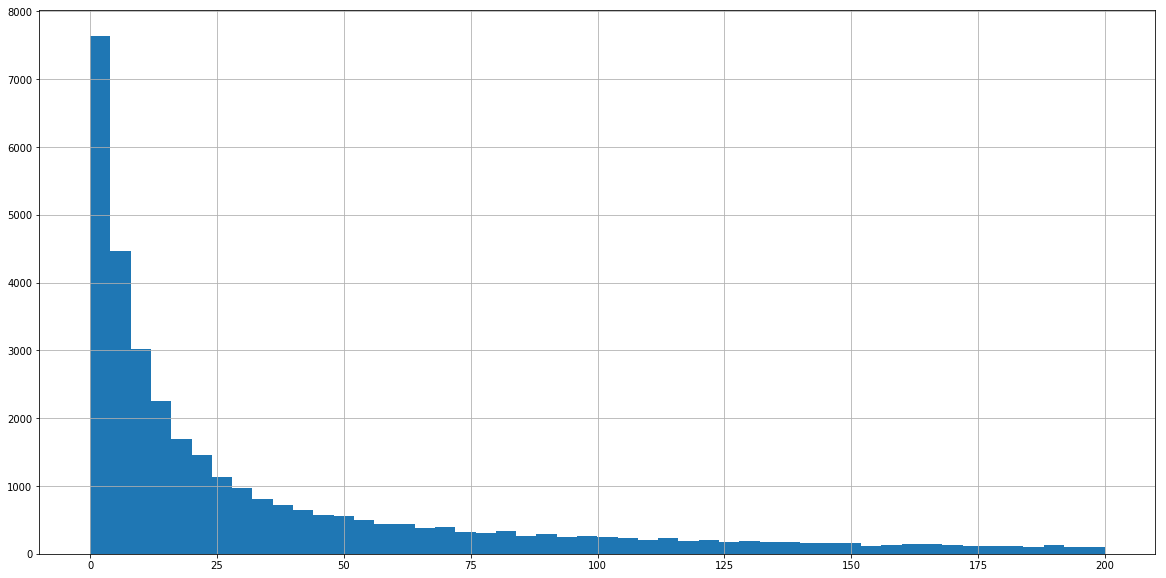

In [7]:
Meteor_Landing.mass[Meteor_Landing.mass<200].hist(bins=50)

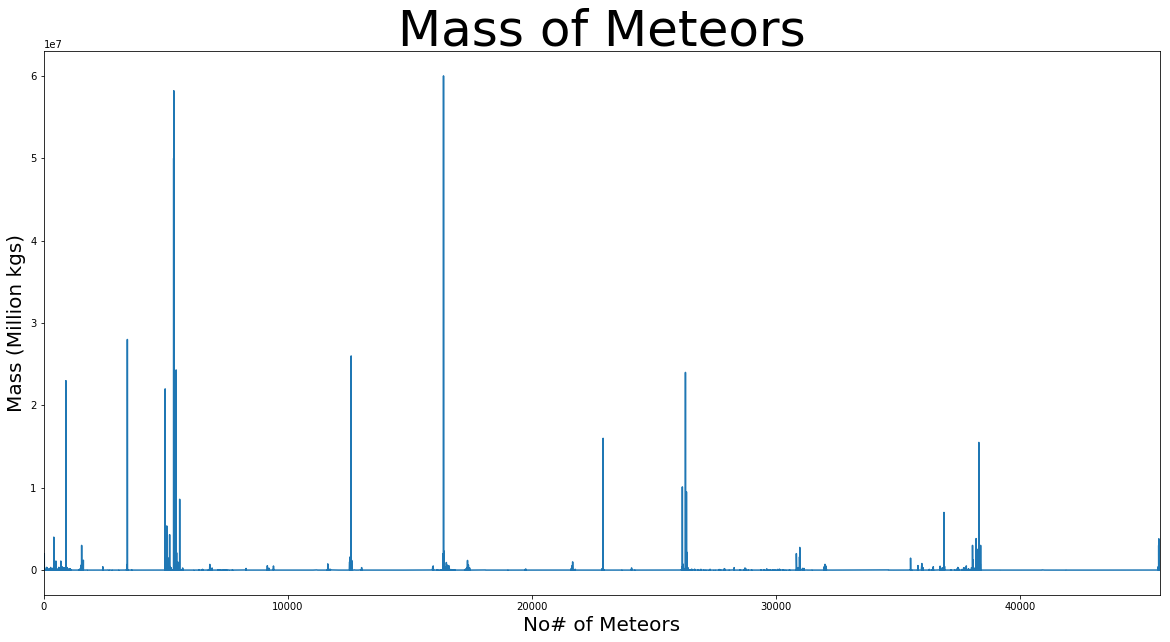

In [7]:
ml = Meteor_Landing.mass[Meteor_Landing.mass>200]
bx = ml.plot(kind="line")
bx.set_title('Mass of Meteors', size=50)
bx.set_xlabel('No# of Meteors', size=20)
bx.set_ylabel('Mass (Million kgs)', size=20)

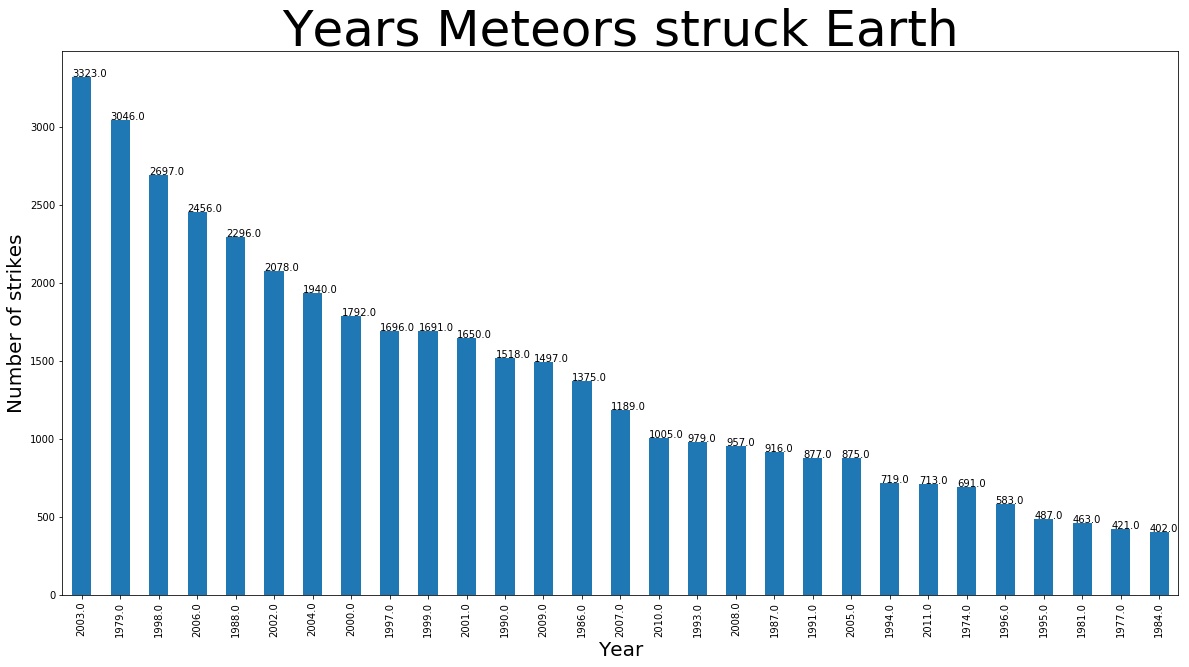

In [9]:
mc = Meteor_Landing.year.value_counts()
mc = mc[mc>400]
ax = mc.plot(kind="bar")
ax.set_title('Years Meteors struck Earth', size=50)
ax.set_xlabel('Year', size=20)
ax.set_ylabel('Number of strikes', size=20)

for robotx in ax.patches:
    ax.annotate(str(robotx.get_height()), xy=(robotx.get_x(), robotx.get_height()), size=10)


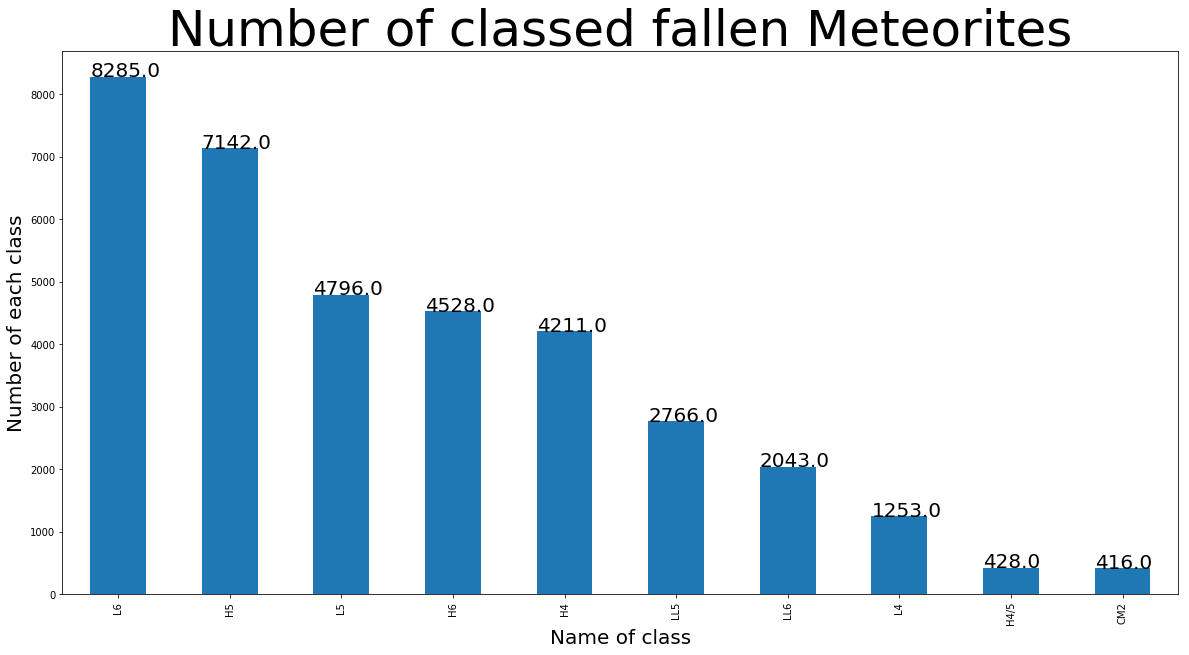

In [10]:
mc = Meteor_Landing.recclass.value_counts()
mc = mc[mc>400]
ax = mc.plot(kind="bar")
ax.set_title('Number of classed fallen Meteorites', size=50)
ax.set_xlabel('Name of class', size=20)
ax.set_ylabel('Number of each class', size=20)

for robotx in ax.patches:
    ax.annotate(str(robotx.get_height()), xy=(robotx.get_x(), robotx.get_height()), size=20)


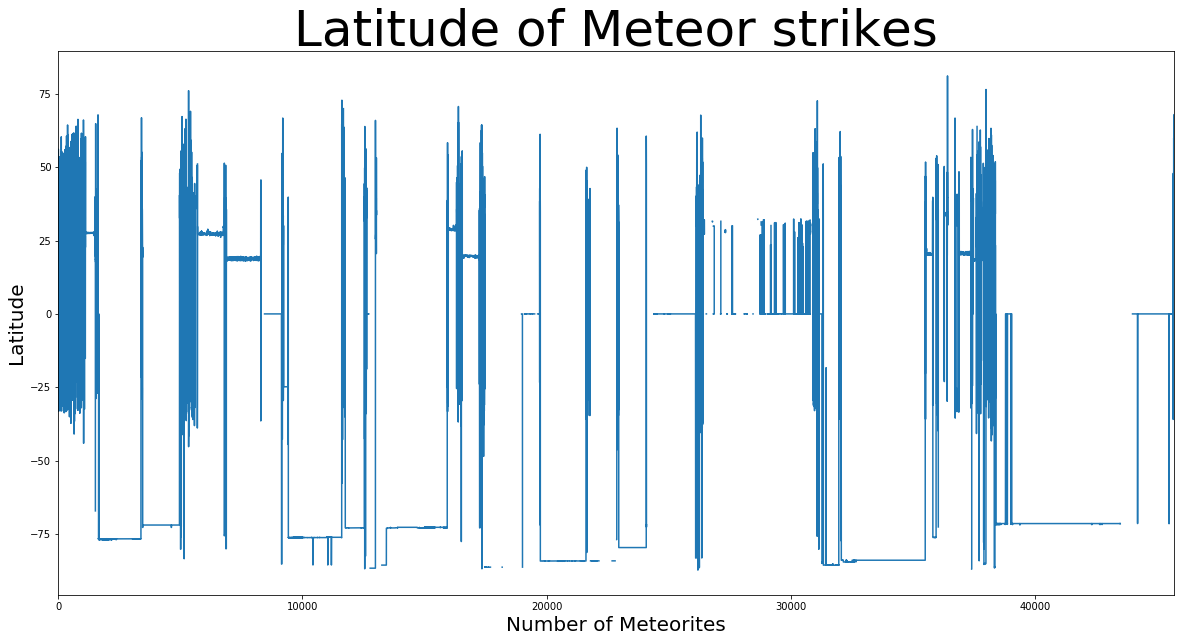

In [11]:
ml = Meteor_Landing.reclat
bx = ml.plot(kind="line")
bx.set_title('Latitude of Meteor strikes', size=50)
bx.set_xlabel('Number of Meteorites', size=20)
bx.set_ylabel('Latitude', size=20)

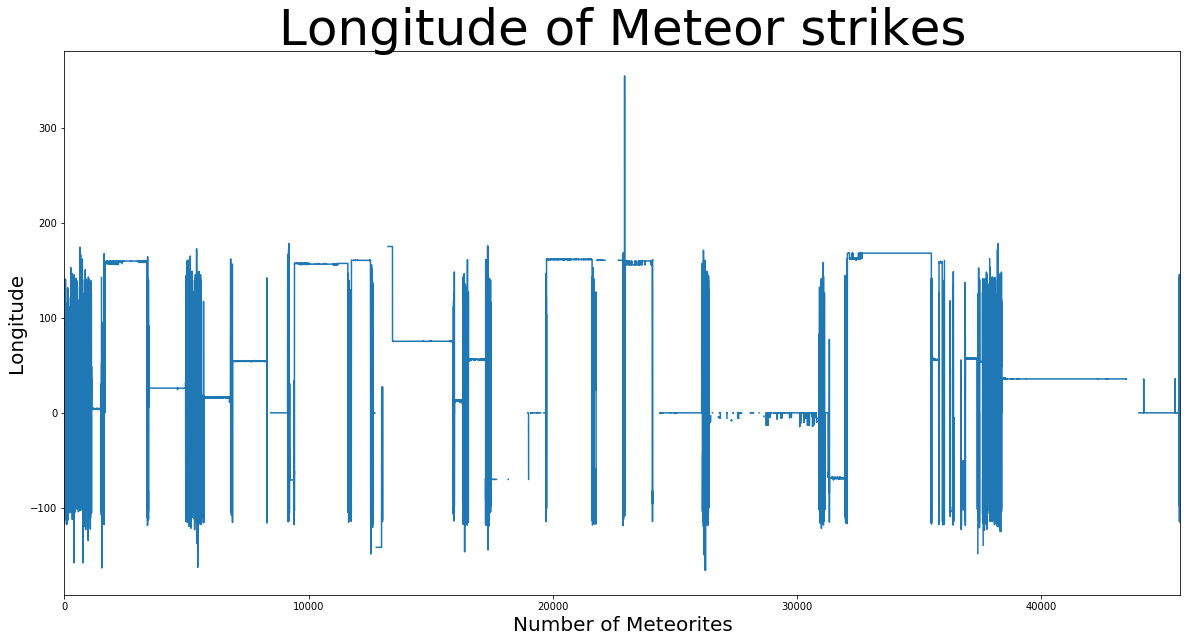

In [12]:
ml = Meteor_Landing.reclong
bx = ml.plot(kind="line")
bx.set_title('Longitude of Meteor strikes', size=50)
bx.set_xlabel('Number of Meteorites', size=20)
bx.set_ylabel('Longitude', size=20)

In [13]:
Meteor_Landing.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [14]:
def make_pt(row):
    return shapely.geometry.point.Point(row.reclong, row.reclat)

Meteor_Landing["geometry"] = Meteor_Landing.apply(make_pt, axis=1)
Meteor_Landing.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",POINT (-99.90000000000001 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",POINT (-64.95 -33.16667)


In [15]:
Meteor_Landing = gpd.GeoDataFrame(Meteor_Landing)
Meteor_Landing.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",POINT (-99.90000000000001 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",POINT (-64.95 -33.16667)


In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

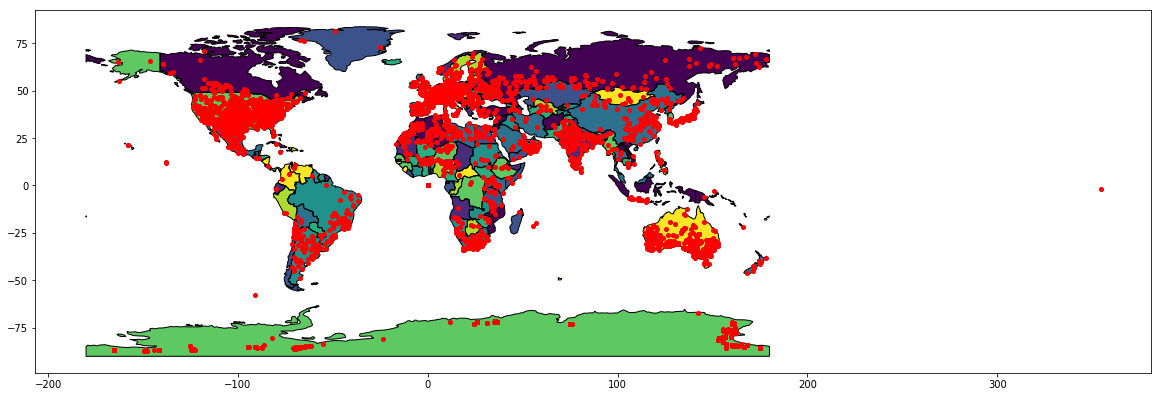

In [59]:
Meteor_Landing[:40000].plot(ax=world.plot(alpha=1), color='red', markersize=4);

In [17]:
mass = Meteor_Landing.mass
print mass

0             21.0
1            720.0
2         107000.0
3           1914.0
4            780.0
5           4239.0
6            910.0
7          30000.0
8           1620.0
9           1440.0
10          1000.0
11         24000.0
12             NaN
13           779.0
14          1800.0
15          3000.0
16         50000.0
17           160.0
18           700.0
19          6000.0
20          2000.0
21           625.0
22           252.0
23           700.0
24          3200.0
25           908.0
26          9251.0
27        228000.0
28         32000.0
29       2000000.0
           ...    
45686     140700.0
45687          3.0
45688         25.9
45689        200.0
45690       7600.0
45691    1000000.0
45692       6660.0
45693       3000.0
45694        300.0
45695      50000.0
45696       8680.0
45697      85000.0
45698          NaN
45699         27.7
45700     162000.0
45701       6700.0
45702       1058.0
45703       3700.0
45704         76.0
45705     630000.0
45706      16000.0
45707    200

In [18]:
#rho =  4190.0
v = 2634.59
kWh = 0.00980665/3600


def energy_kWh(row):
    return row.mass*v*kWh

Meteor_Landing['energy_kWh'] = Meteor_Landing.apply(energy_kWh, axis=1)
Meteor_Landing.head(50)



,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,geometry,energy_kWh
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",POINT (6.08333 50.775),0.150713
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",POINT (10.23333 56.18333000000001),5.167300
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",POINT (-113 54.21666999999999),767.918255
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",POINT (-99.90000000000001 16.88333),13.736407
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",POINT (-64.95 -33.16667),5.597909
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)",POINT (71.8 32.1),30.422481
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.833330, 95.166670)",POINT (95.16667 44.83333),6.530894
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)",POINT (0.6166699999999999 44.21667),215.304184
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)",POINT (-65.23333000000001 -31.6),11.626426
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)",POINT (-64.55 -30.86667),10.334601


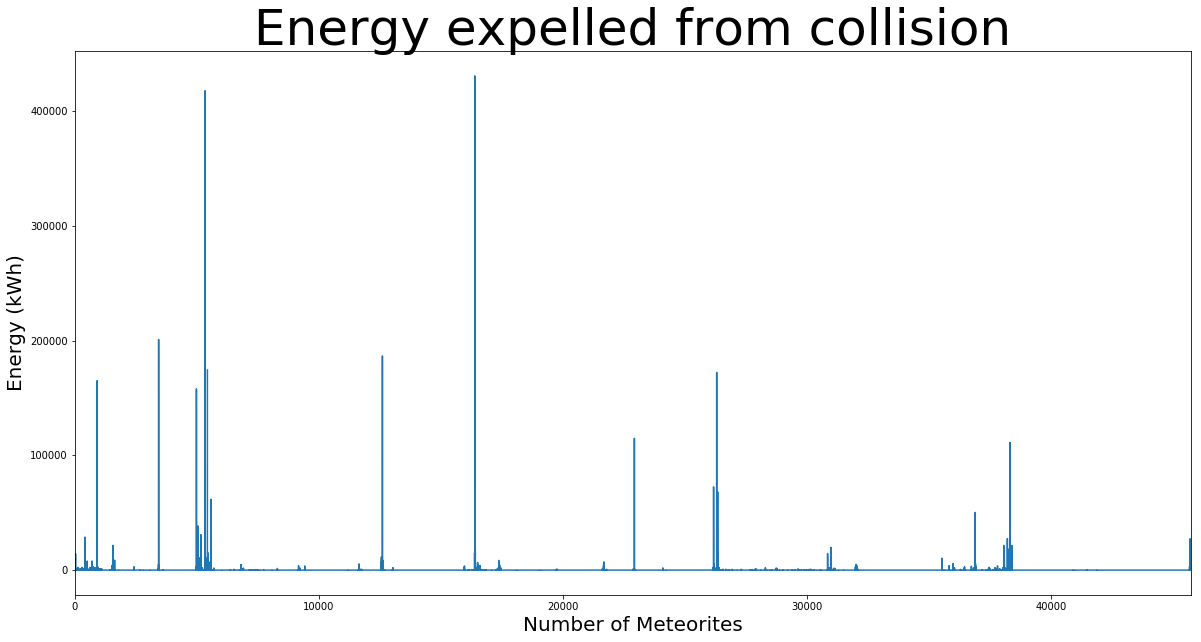

In [30]:
Meteor_Landing.energy_kWh
me = Meteor_Landing.energy_kWh
bx = me.plot(kind="line")
bx.set_title('Energy expelled from collision', size=50)
bx.set_xlabel('Number of Meteorites', size=20)
bx.set_ylabel('Energy (kWh)', size=20)